## ASSIGNMENT 3

Tegar Ahmad Arsy

PYTN-KS07-020

In [3]:
# import data dan menampilkan data
import pandas as pd

df = pd.read_csv('bank-full.csv', skipinitialspace=True, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.isnull().sum().sort_values()

age          0
previous     0
pdays        0
campaign     0
duration     0
month        0
day          0
poutcome     0
contact      0
housing      0
balance      0
default      0
education    0
marital      0
job          0
loan         0
y            0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# 1. Binary - Multi-variate Logistic Regression 

Import Library

In [7]:
#import library

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
# Drop data selain numeric 

data = df[['age','balance','day','duration','campaign','pdays','previous','y']]
data

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,no
1,44,29,5,151,1,-1,0,no
2,33,2,5,76,1,-1,0,no
3,47,1506,5,92,1,-1,0,no
4,33,1,5,198,1,-1,0,no
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes
45207,71,1729,17,456,2,-1,0,yes
45208,72,5715,17,1127,5,184,3,yes
45209,57,668,17,508,4,-1,0,no


Nyatakan *predictor* dan *criterion* untuk setiap objek dan split dataset

In [9]:
x = data.drop('y', axis=1)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Standarisasi 

In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Create Model

In [11]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [12]:
# Menskalakan x_test
x_test = scaler.transform(x_test)


In [13]:
y_pred = model.predict(x_test)


In [14]:
model.score(x_train, y_train)


0.8900962176509621

In [15]:
model.score(x_test, y_test)


0.8854362490324007

Confussion Matrix

In [16]:
confusion_matrix(y_test, y_pred)


array([[7821,  131],
       [ 905,  186]], dtype=int64)

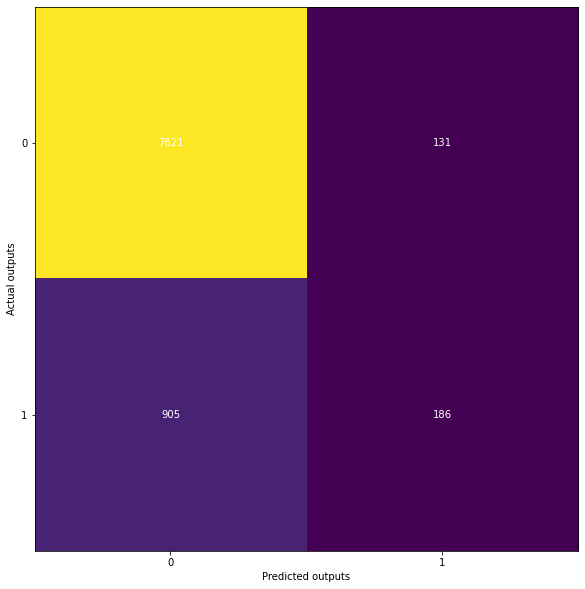

In [17]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Classification report

In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.59      0.17      0.26      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043



# KNN

In [19]:
# Import library

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [20]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [22]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
a = le.fit_transform(df['loan'])

#copy data
df_transform = df.copy()


In [23]:
pd.DataFrame(a)
a

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
df_transform['loan'] = a
df_transform

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,0,telephone,17,nov,508,4,-1,0,unknown,no


In [25]:
df_transform

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,0,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
def transform(col) :
    a = le.fit_transform(df[col])
    pd.DataFrame(a)
    df_transform[col] = a

In [43]:
transform('education')
transform('marital')
transform('job')
transform('default')
transform('contact')
transform('month')
transform('poutcome')
transform('y')

df_transform


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,yes,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,yes,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,yes,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,yes,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,no,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,no,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,no,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,no,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,no,0,1,17,9,508,4,-1,0,3,0


Spliting data

In [57]:
x = df_transform.drop('y', axis=1)
y = df_transform['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

0


Modeling


In [55]:
#membuat KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training model
knn.fit(x_train, y_traina)

#Prediksi respon menggunakan data test
y_pred = knn.predict(x_test)

ValueError: could not convert string to float: 'yes'

Menghitung Akurasi

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8488333517637952


Improv model yang telah dibuat

Mencari informasi error pada model yang telah di buat

In [37]:
error = []

# Menghitung error pada nilai k daro 1-40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

ValueError: could not convert string to float: 'yes'

Dari plot tersebut didapatkan informasi nilai error terkecil di K = 6

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Naive Bayes 